In [9]:
%reload_ext autoreload
%autoreload 2


import sys  
import os 


# local files
sys.path.insert(
    0,
    os.path.join(
        os.path.dirname(
            os.path.dirname(
                os.path.abspath('__notebook__.ipynb')
            )
        ),
        "src"
    )
)
from stuned.utility.utils import (
    PROJECT_ROOT_ENV_NAME,
    get_stuned_root_path
)
from stuned.local_datasets.utils import (
    make_or_load_from_cache,
    show_dataloader_first_batch
)
from stuned.local_datasets.features_labeller import (
    make_features_labeller,
    load_features_labeller
)
from stuned.utility.logger import (
    make_logger
)

In [2]:
features_labeller_config = {
    'features_list': ['shape', 'scale', 'orientation'],
    'num_classes_per_feature': 3,
    'num_samples_per_cell': 10,
    'base_data': {
        'type': 'dsprites',
        'dsprites': {
            'type': "color",
            'train_val_split': 0.8,
            'path': os.path.join(get_stuned_root_path(), "data", "dsprites"),
        }
    }
}
batch_size = 32
cache_path = os.path.join(get_stuned_root_path(), "cache")

In [3]:
features_labeller = make_or_load_from_cache(
    "features_labeller_with_dsprites",
    features_labeller_config,
    make_features_labeller,
    load_features_labeller,
    cache_path=cache_path,
    forward_cache_path=True,
    logger=make_logger()
)

2023-06-12 21:49:58.600314 (log): Loading cached
    features_labeller_with_dsprites from
    /mnt/beegfs/oh/arubinstein17/github_beegfs/diverse-universe/submodules/STAI-tuned/cache/features_labeller_with_dsprites_d96c91a8a4c61de39570.pkl


In [4]:
train_dataloaders_dict, val_dataloaders_dict = features_labeller.get_dataloaders(
    train_batch_size=batch_size,
    test_batch_size=batch_size,
    num_workers=1,
    single_label=False
)

In [5]:
diag_train_dataloader = train_dataloaders_dict.get("diag_shape+scale+orientation")
off_diag_train_dataloader = train_dataloaders_dict.get("off-diag")

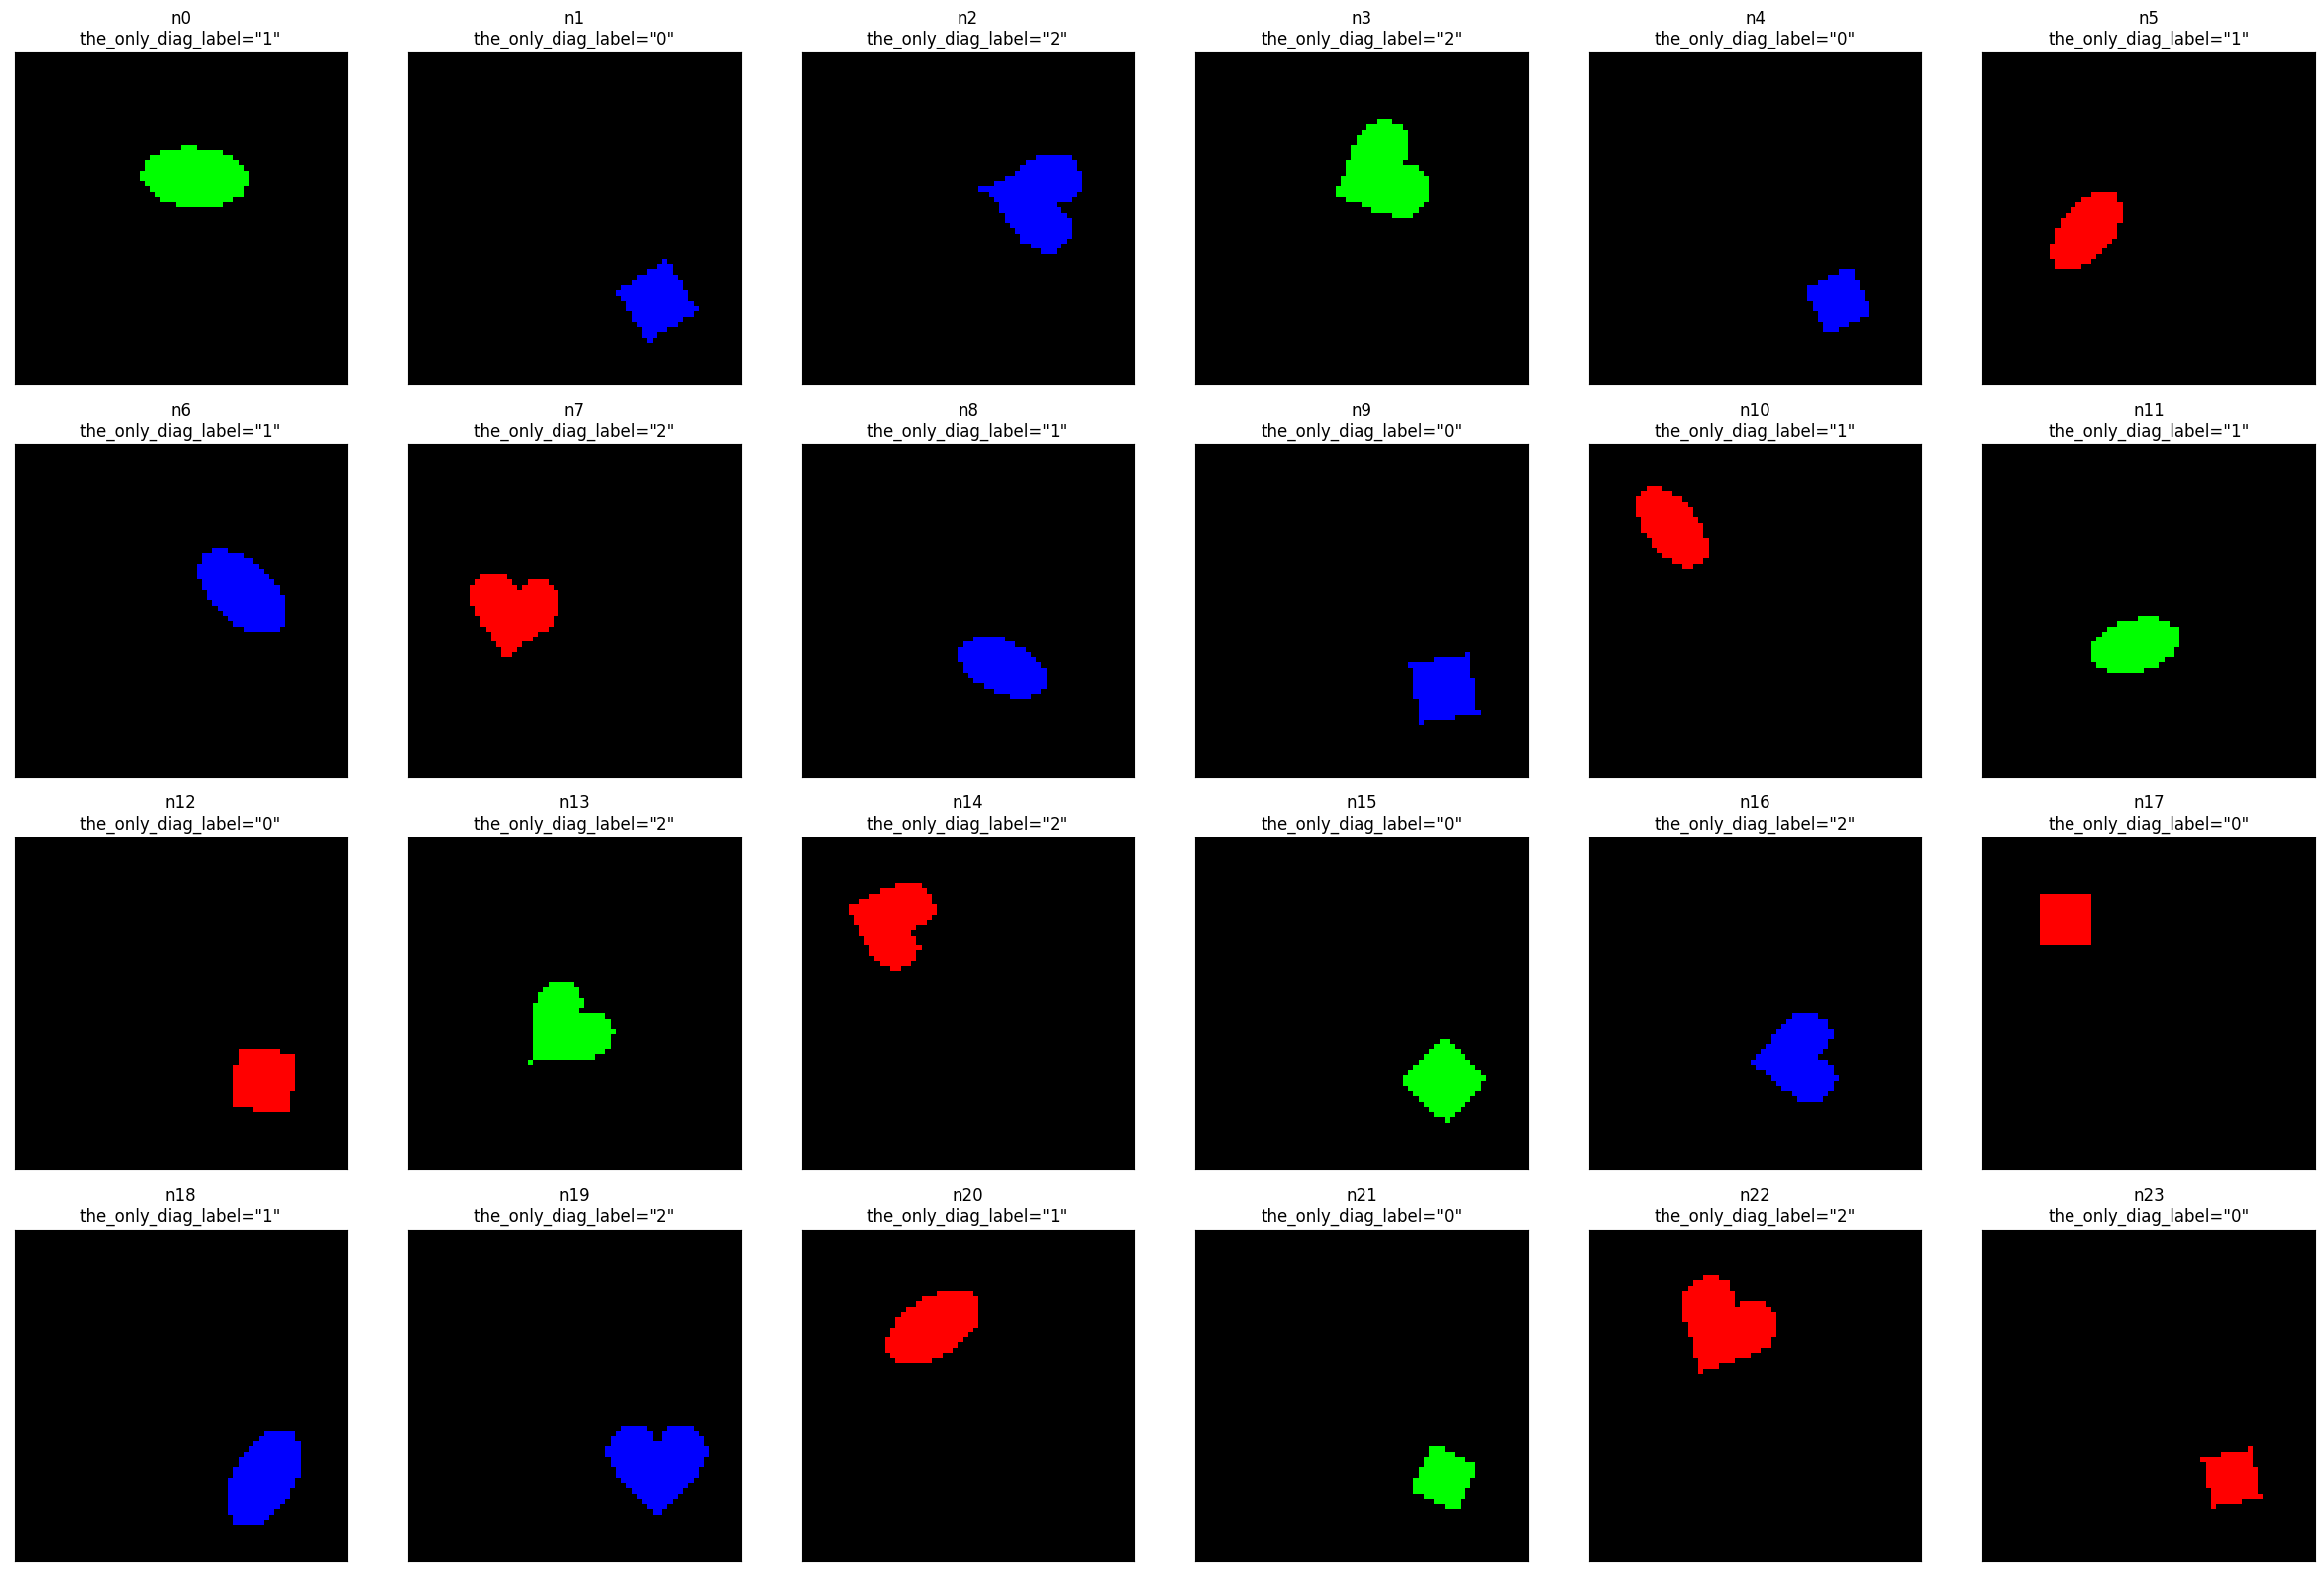

In [10]:
show_dataloader_first_batch(diag_train_dataloader, label_names=["the_only_diag_label"])

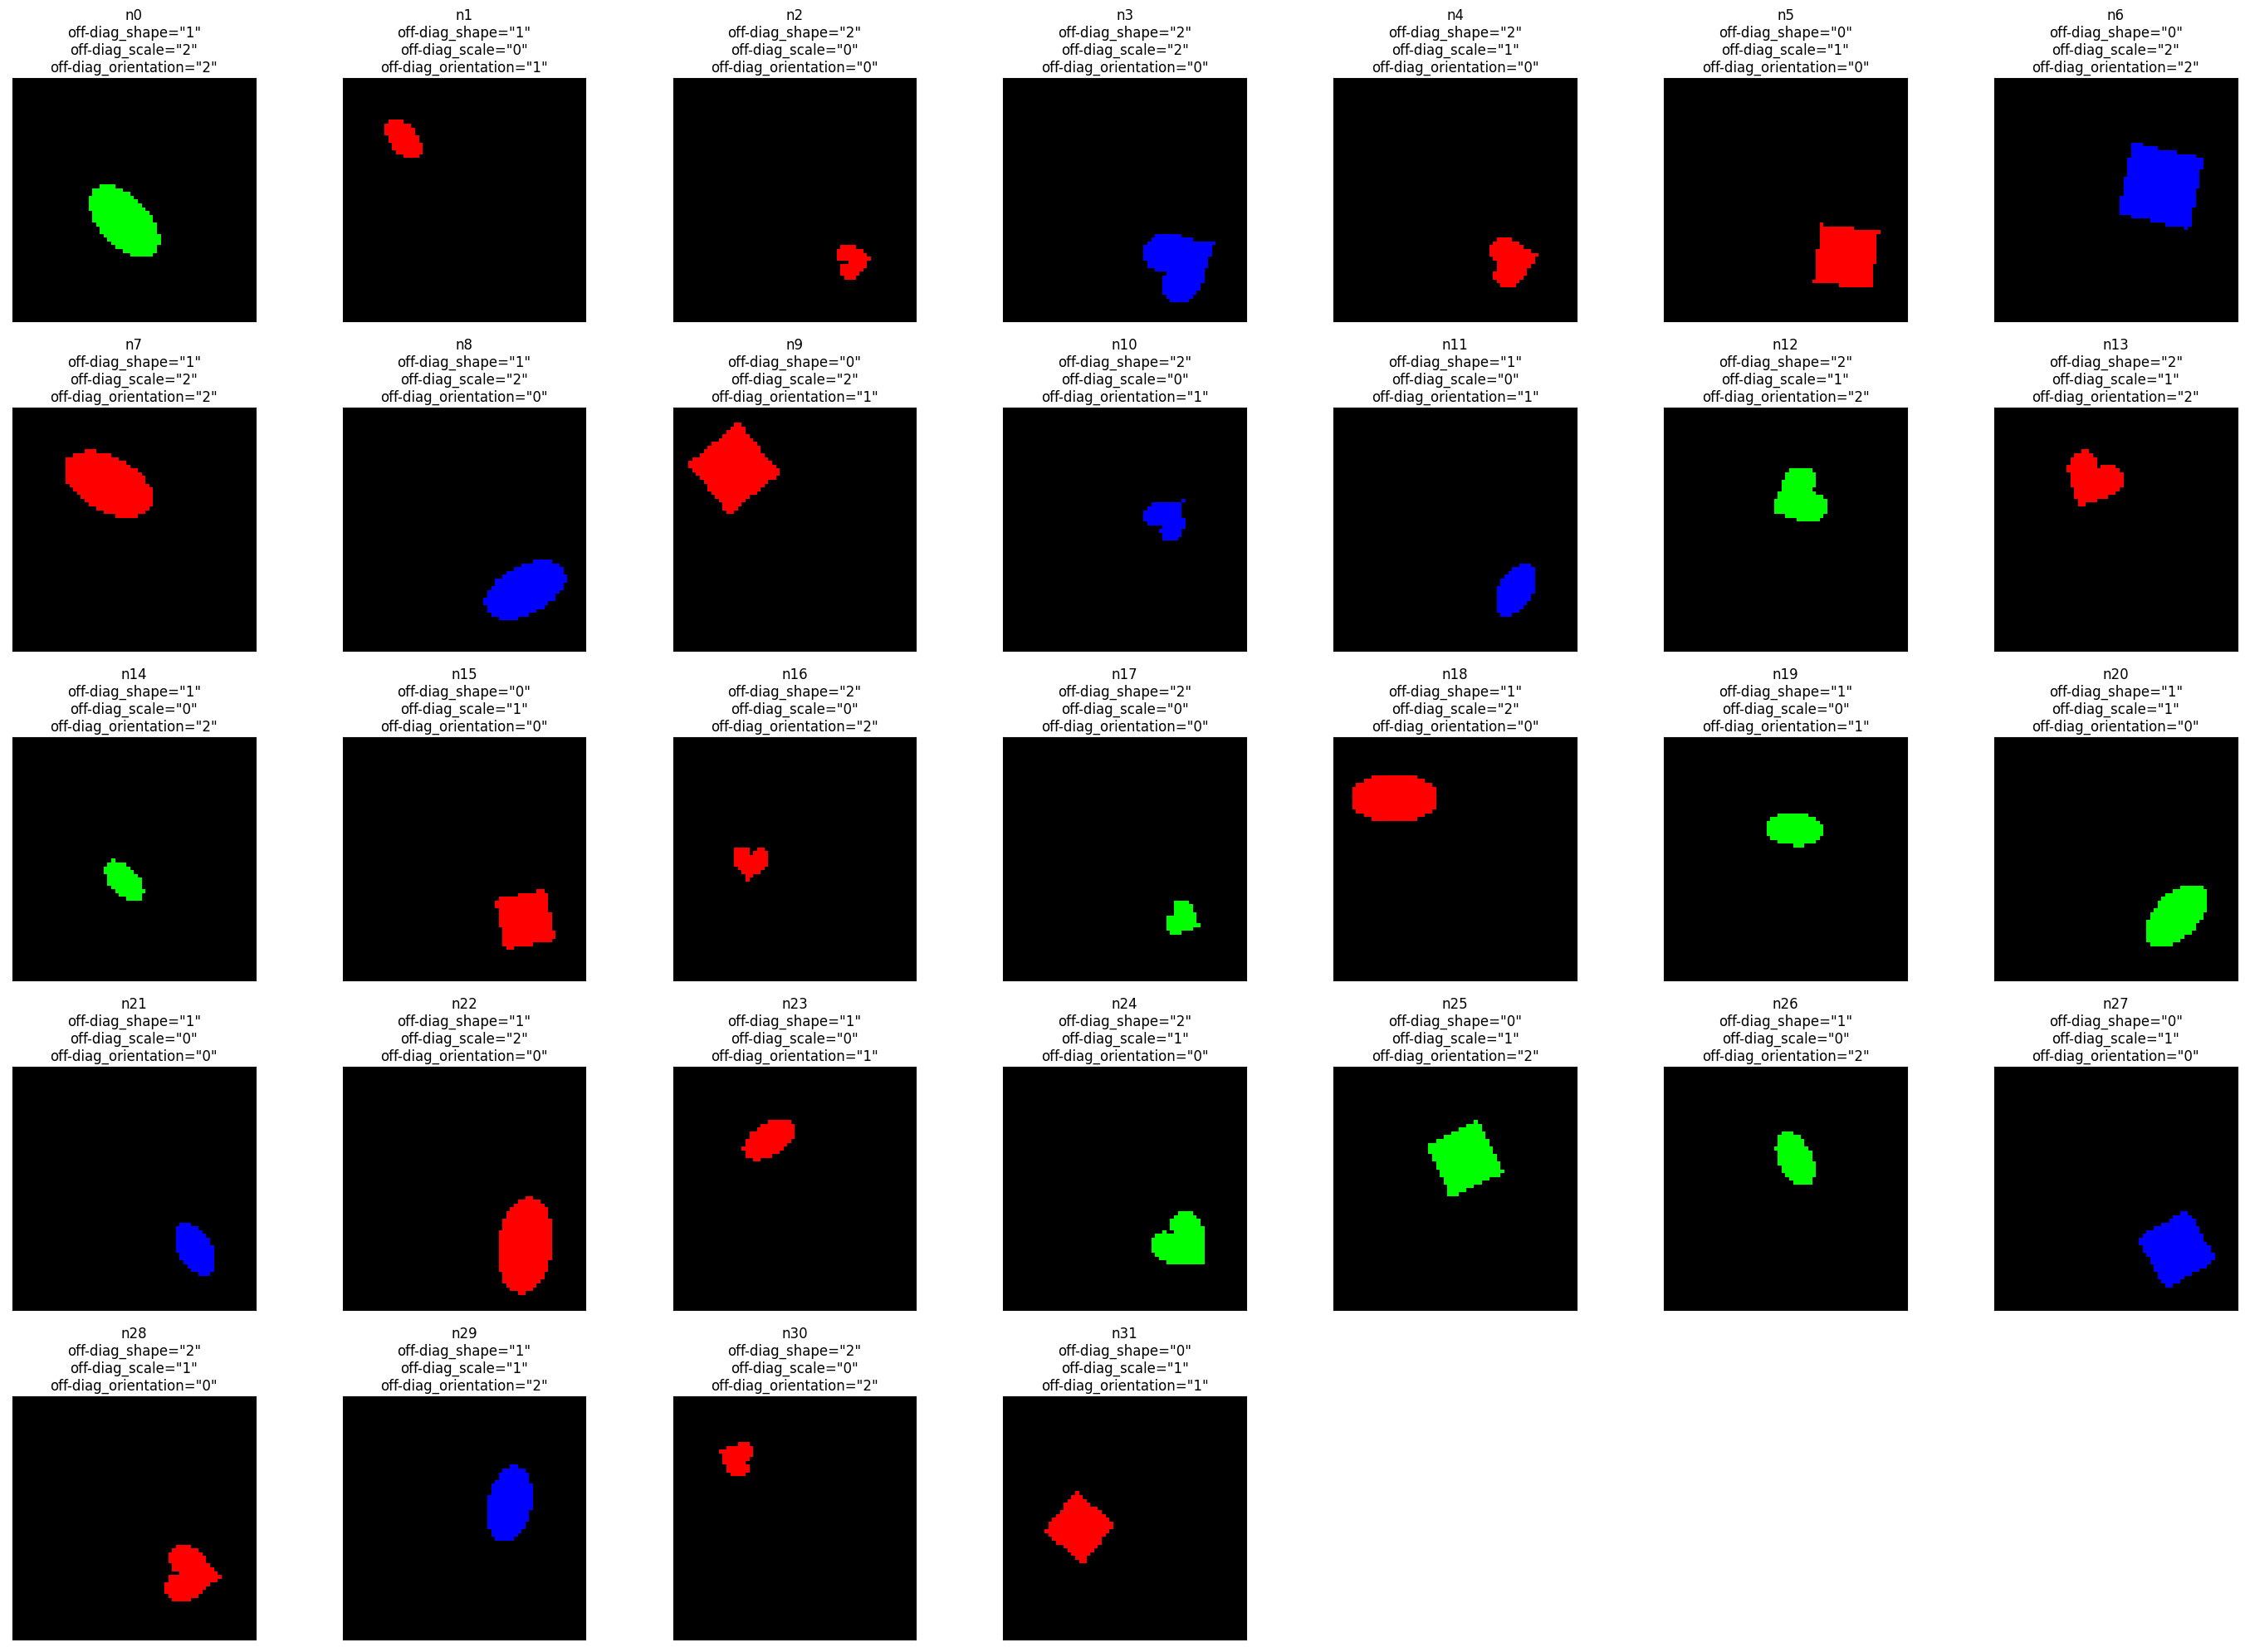

In [11]:
show_dataloader_first_batch(off_diag_train_dataloader, label_names=off_diag_train_dataloader.label_names)